In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [2]:
train_path= "/content/train_data.txt"
train_data = pd.read_csv(train_path, sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")

In [3]:
train_data

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
46507,Girls Night Out (1997),short,"On a Friday evening, Manhattan gallery owner ..."
46508,Ripped to Shreds (????),horror,A northern Minnesota Doctor is developing a n...
46509,Dolls (2006),short,Inspired by a story that appeared in a 1950's...
46510,Kein Zurück - Studers neuster Fall (2007),crime,Detective Claudia Studer (Judith Hofmann) is ...


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46511 entries, 1 to 46511
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        46511 non-null  object
 1   GENRE        46511 non-null  object
 2   DESCRIPTION  46511 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


In [5]:
train_data.describe()

,TITLE,GENRE,DESCRIPTION
count,46511,46511,46511
unique,46511,27,46412
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,11688,11


In [6]:
test_path= "/content/test_data.txt"
test_data = pd.read_csv(test_path, sep=":::", names=["ID","TITLE","DESCRIPTION"], engine="python")

In [7]:
test_sol_path= "/content/test_data_solution.txt"
test_sol_data = pd.read_csv(test_sol_path, sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")

In [8]:
test_data.shape

(54200, 3)

In [9]:
test_data.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [11]:
train_data

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
46507,Girls Night Out (1997),short,"On a Friday evening, Manhattan gallery owner ..."
46508,Ripped to Shreds (????),horror,A northern Minnesota Doctor is developing a n...
46509,Dolls (2006),short,Inspired by a story that appeared in a 1950's...
46510,Kein Zurück - Studers neuster Fall (2007),crime,Detective Claudia Studer (Judith Hofmann) is ...


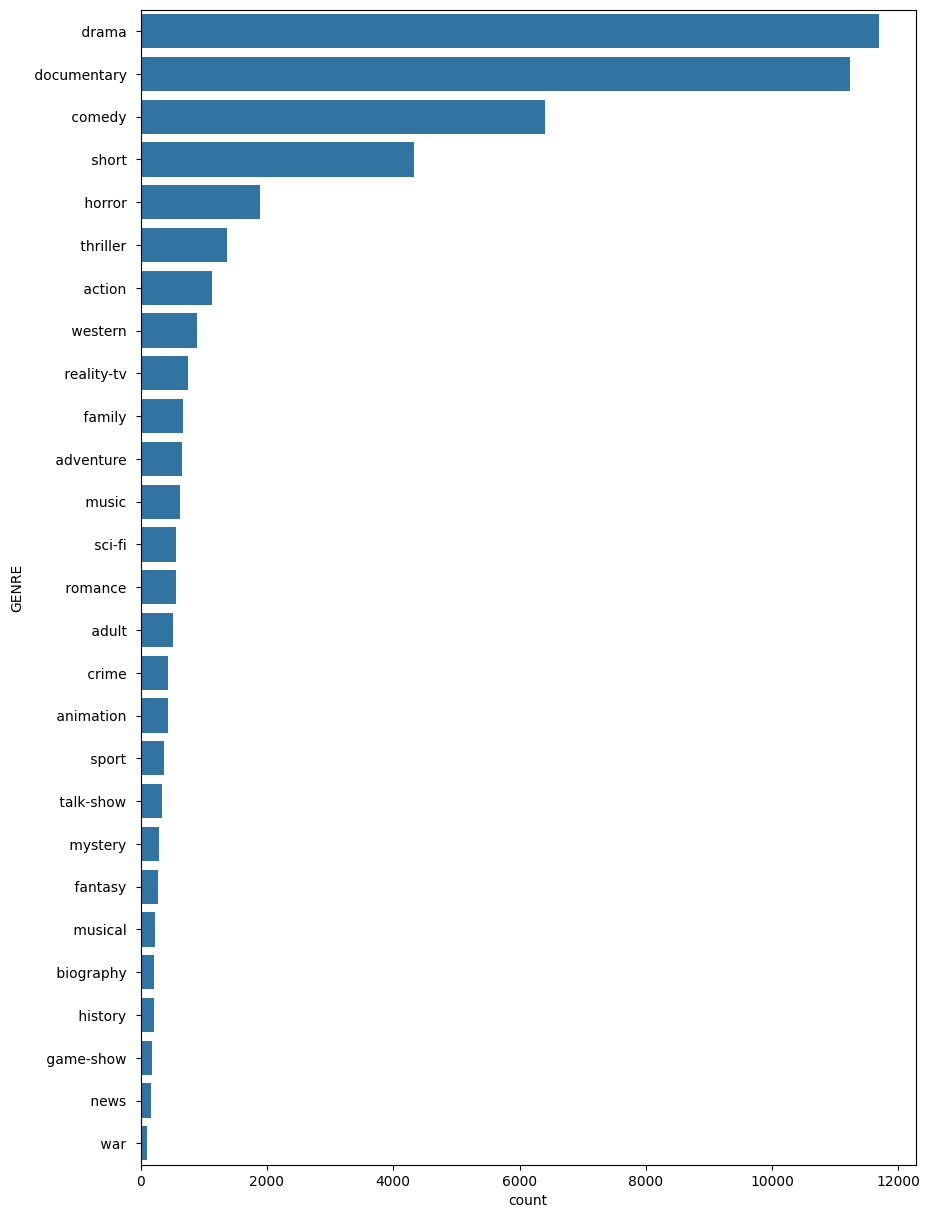

In [12]:
plt.figure(figsize=(10,15))
sns.countplot(data=train_data, y="GENRE", order= train_data["GENRE"].value_counts().index)
plt.show()

In [14]:
!pip install nltk
import nltk
import re
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords

nltk.download('stopwords')

stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))

def cleaning_data(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d', ' ', text)
    return text

train_data["TextCleaning"] = train_data["DESCRIPTION"].apply(cleaning_data)
test_data["TextCleaning"] = test_data["DESCRIPTION"].apply(cleaning_data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
X = train_data.drop(columns=['GENRE'])
y = train_data['GENRE']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [17]:
print(X_train.shape)
print(y_train.shape)

(37208, 3)
(37208,)


In [18]:
print(X_test.shape)
print(y_test.shape)

(9303, 3)
(9303,)


In [19]:
vectorize = TfidfVectorizer(stop_words=stopwords.words('english'))

X_train_tfidf = vectorize.fit_transform(X_train["TextCleaning"])

X_test_tfidf = vectorize.transform(X_test["TextCleaning"])

In [20]:
X_test_data = vectorize.transform(test_data["TextCleaning"])


In [21]:
X_test_data.shape

(54200, 97139)

In [22]:
test_sol_data.shape

(54200, 3)

In [23]:
X_train_tfidf.shape

(37208, 97139)

In [24]:
y_train.shape

(37208,)

In [25]:
NB_model = MultinomialNB()
NB_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [26]:
y_test_sol = test_sol_data['GENRE']

In [27]:
y_pred = NB_model.predict(X_test_data)

print("Accuracy:", accuracy_score(y_test_sol, y_pred))

Accuracy: 0.44226937269372696


In [28]:
print("Classification Report:", classification_report(y_test_sol, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:                precision    recall  f1-score   support

      action        0.00      0.00      0.00      1314
       adult        0.00      0.00      0.00       590
   adventure        0.00      0.00      0.00       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.69      0.04      0.07      7446
       crime        0.00      0.00      0.00       505
 documentary        0.53      0.89      0.67     13096
       drama        0.38      0.88      0.53     13612
      family        0.00      0.00      0.00       783
     fantasy        0.00      0.00      0.00       322
   game-show        0.00      0.00      0.00       193
     history        0.00      0.00      0.00       243
      horror        0.00      0.00      0.00      2204
       music        0.00      0.00      0.00       731
     musical        0.00      0.00      0.00       276
     mystery        0.00      0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
